<a href="https://colab.research.google.com/github/NatyEsquenazi/Data-Visualization/blob/main/Clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('gapminder')
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Haciendo un (primer) gráfico

## Objetivos
- Conocer algunas de las funciones centrales de `ggplot`
- Entender el flujo de trabajo para producir una visualización (que es más o menos similar en todos los casos)
- Lograr algunas visualizaciones bastante sofisticadas en poco tiempo

## ¿Cómo funciona `ggplot`?
Como vimos en la clase pasada, una visualización implica represetar los datos usando línea, formas, colores, tamaños, etc. Existe un "mapeo", es decir, una relación estructurada, entre las variables en el dataset y su representación en la pantalla o en el papel.

A su vez, no todas los mapeos tienen sentido para todas las variables y que algunas representaciones son más difíciles de interpretar que otras.

`ggplot` provee una serie de herramientas para facilitar estas operaciones de mapeo entre los datos y las representaciones estéticas. De esta forma, permite tunear bastante finamente los gráficos para representar lo que uno quiere.

La siguiente figura muestra un flujo más o menos estándar del proceso... comenzando por los datos y terminando en el gráfico. La idea, por ahora, es tener una idea del proceso general. Las próximas clases nos iremos metiendo en detalle en cada una de las etapas. No desesperen...

<img src="https://socviz.co/assets/ch-03-ggplot-flow-vertical.png" width="400" height="1600" />

El punto más importante para usar `ggplot` es tratar de pensar en la estructura lógica del gráfico que se busca crear. El código que se escribe (que veremos, no es tan complicado) simplemente especifica las conexiones entre las variables en el dataset y los colores, formas, tamaños, etc. que veremos en la pantalla. En la terminología de `ggplot` estas conexiones se llaman _aesthetics_ o _estéticas_.

Siempre se comienza cada gráfico "diciéndole" a la función `ggplot()` cuál es tu data y cuáles de las variables en esa data se van a mapear con algua estética del gráfico. Luego, tomamos el resultado y especificamos qué tipo general de gráfico queremos hacer (un scatterplot, un boxplot, un histograma, etc.). Así

- `geom_point()` genera scatterplots
- `geom_bar()` genera gráficos de barras
- `geom_boxplots()` genera gráficos de cajas y bigotes (boxplots)
- etc... (hay muuuuuchas de estas funciones)

Luego, combinamos estas dos piezas el objeto `ggplot` y la geometría sumándolas con el signo `+`.

En términos generales, eso es todo. Con esto se puede hacer un plot. El resto (y sobre lo que vamos a ir trabajando) es la _sintonía fina_: especificar de forma correcta los detalles. Si no especificamos nada... `ggplot` va a tomar una serie de decisiones por defecto. Pero en general, vamos a querer trabajar sobre esos detalles:

- qué escalas vamos a usar en los ejes
- las etiquetas de los ejes y las leyendas
- alguna(s) otra(s) guía(s) para hacer más legible(s) los resultados

Todos estos detalles adicionales van a ir siendo "sumados" de la misma forma como hicimos con la función `geom_`. Cada componente tiene su prpia función, vamos setenado los arguemtnos de cada una y, finalmente, la sumamos con el `+`. Así podemos ir construyendo cada gráfico **paso a paso**...

<img src="https://lmdiario.com.ar/download/multimedia.normal.b1bca6398082375e.6d65726c6f5f6e6f726d616c2e6a7067.jpg" width="300" height="200" />

A continuación vamos a ir trabajando sobre éste proceso... Vamos a proceder por ejemplos, construyendo repetidamente series de gráficos. Recomendación: no copien el código, escríbanlo desde cero. Es la forma más efectiva de habituarse a codear y sentirse cómodes con la sintaxis. Van a cometer errores... no hay problema.

## Datos ordenados (tidy)
Nos vamos a estar refiriendo bastante a los "datos ordenados" o _tidy data_ ([Wickham, 2014](https://vita.had.co.nz/papers/tidy-data.pdf])). De alguna manera, se vincula al formato de los datos.

- en una tabla en formato "largo" (long), cada variable es una columna y cada observación es una fila
- en una tabla en formato "ancho" (wide), algunas variables está esparcidas a lo largo de las columnas.

Por ejemplo, veamos la tabla 1. 


<img src="https://github.com/gefero/idaes_viz/blob/main/imgs/clase_2_02_long_data.png?raw=true" width="800" height="250" />

---
### Preguntas
- ¿Qué información presenta? 
- ¿Cuál de los dos formatos les parece que representa?
- ¿Y la tabla 2?

<img src="https://github.com/gefero/idaes_viz/blob/main/imgs/clase_2_03_wide_data.png?raw=true" width="800" height="250" />
---

Si comparamos las dos tablas, parece evidente que una tabla "tidy" no presenta la información en su forma más compacta. De hecho, si quisiéramos mostrarle a la gente los números (y no un gráfico) probablemente una tabla como la 1 (en ese formato ancho) sería más apropiada. 

No estamos queriendo decir que las tablas wide sean peores o desordenadas en términos absolutos. Cada formato depende de lo que se está buscando hacer. En ese sentido, vamos a ver que el formato long hace mucho más fácil especificar los mapeos que necesitamos entre datos y estéticas.

## Mapeando datos a objetos estéticos
Va a ser útil pensar en una "receta" para arrancar cada vez que querramos hacer un gráfico:


<img src="https://socviz.co/assets/ch-03-ggplot-formula-schematic.png" width="300" height="200" />


1. Empezamos con un solo objeto: , que debería estar en una forma que ggplot entienda (generalmente, un dataframe o algo similar como una tibble). Le decimos a `ggplot` cuál es nuestra data.
2. Guardamos esta info en un objeto `p`, que va a contener la informacion fundamental del plot.
3. Elegimos un tipo de plot (generalmente, una `geom_`) y la sumamos con `+`
4. Vamos agrengado las capas que necesitemos...

Vamos a usar data de [Gapminder](https://www.gapminder.org/) para hacer nuestros primeros plots.



In [ ]:
library(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


---
### Preguntas 2 
- ¿En qué formato está esta data?
- ¿Qué información tiene?
- ¿Cuáles son las variables y las unidades de análisis?

---



La unidad de analisis serian los paises 

Queremos plotear la expectativa de vida contra el PBI per cápita para cada país-año del deataset. Apliquemos la receta:

**1. Creamos el objeto `p`, definiendo cuál es la data...**

In [ ]:
p <- ggplot(data = gapminder)

Hasta acá `ggplot` solo sabe cuál es el dataset pero no sabe cual es el mapeo (o `mapping`). Tenemos que definir cuáles son las variables que van a ser mapeadas a elementos visuales en el gráfico...

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp))

Veamos:
- el argumento `data=` le  dice a `ggplot` donde buscar las variables que se van a usar
- el argumento que toma `mapping=` es una función
- esa función es `aes()` es una secuencia de definiciones que `ggplot` va a usar luego. Le dice 
> "la variable que va en el eje x es gdpPecap, la que va en el eje y es lifeExp"

Como definimos que los datos están en el objeto gapminder, `ggplot` busca los nombres de las variables allí.
- `mapping = aes(...)` linkea las variables con cosas que vamos a ver en el gráfico. Los valores de x e y son los más obvios. Pero hay otros mapeos estéticos (o aestethic mappings): por ejemplo, el color, la forma, el tamaño, el tipo de línea o punto, etc. Es importante notar que el mapeo une variables con elementos visuales pero no define específicamente cuáles van a ser.

¿Qué pasa si tipeamos p en la consola?

In [ ]:
p

Vemos que se agregó información al objeto:
- efectivamente se creó un objeto p
- en el eje x está la variable gdpPercap
- en el eje y, la variable lifeExp


**2. Elegimos el tipo de gráfico**

Pero todavía no le dimos información sobre el tipo de gráfico que queremos hacer (o la "geometría"). Para ello tenemos que agregar una capa, eligiendo alguna función `geom_`.

Probemos con `geom_point()` para hacer un scatterplot. Ya sabe que tiene que poner en el eje X y en el Y.

In [ ]:
p + geom_point()

## Construyendo gráficos por capas
Lo bueno es que, conceptualmente, a partir de ahora la cosa no va a cambiar tanto. Será una cuestión de aprender con mayores detalles qué hace `ggplot` y cómo decirle que haga lo que queremos. Vamos a aprender bastante sobre geoms (o tipos de gráficos), y sobre las funciones que controlan las ecalas de los ejes, etiquetas, etc. Con estas pocas herramientas vamos a poder generar gráficos bastante sofisticados. 

Pero siempre vamos a estar aplicando nuestra receta:

1. Decirle a la función `ggplot()` cuál es nuestra data => el paso `data=...`
2. Decirle a `ggplot()` que relaciones queremos ver => el paso `mapping = aes(...)`

> Por conveniencia vamos a guardar los resultados de estos dos primeros pasos en un objeto llamado `p`.

3. Decirle a `ggplot()` como queremos ver esas relaciones => elegir una `geom_`
4. Apilar o agregar tantas geoms como neceistemos al objeto `p` de a una por vez scale_, family, labs() and guides() functions. 
5. Usar funciones adicionales para ajustar escalas, etiqueta, títulos, etc. => Funciones de la familia `scale_`,  `labs()` and `guides()`.

Para empzar vamos a dejar que ggplot use los valores por defecto para varias cosas (titulos, marcas en ejes, etiquetas, leyendas, etc.). Por ejemplo, ggplot siempre asume por defecto un sistema de coordenadas cartesianos: un plano definido por x e y.

Por ejemplo, usemos otra función `geom_` con el plot:

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y=lifeExp))
p + geom_smooth()

Ya no vemos puntos en el eje X e Y. Lo que hizo `geom_smooth()` es calcular una línea de suavizado y mostrarnos (en gris sombread) los valores de error estimados.

Si queremos ver tanto los puntos como el suavizado, simplemente, tenemos que agregar de nuevo el `geom_point()`:

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y=lifeExp))
p + geom_point() + geom_smooth(se=FALSE) 

El mensaje que aparece nos avisa que `geom_smooth()` está usando un método llamado "gam" (es decir, que ha suavizado con un modelo aditivo generalizado)

Hay otros métodos... por ejemplo, podríamos querer fitear una línea recta: podemos lograr esto modificando los argumentos de `geom_smooth(), introduciendo `method = "lm"`:

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y=lifeExp))
p + geom_point() + geom_smooth(method = "lm", se=TRUE) 

Algunas cosas importantes a notar:
- no tenemos que decirle a `geom_point()` o a `geom_smooth()` de dónde viene la data o que mapeos deberían usar; heredan la información del objeto `p`.
- la data aparece bastante apilada sobre el eje izquierdo; es obvio que el PBI per cápita no aparece distribuido normalmente u homogéneamente entre los países.
- para solucionar este problema, podemos probar modificar la escala del eje X y transformarla en escala logarímica; vamos a usar una función ` scale_x_log10()`. 

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp))
p + geom_point() +
    geom_smooth(method = "gam") +
    scale_x_log10()


Esta transformación afecta a los puntos y también cambia la forma de la línea de suavizado. Mientras que `ggplot()` y sus funciones asociadas no hagan cambios en los datos subyacentes (el objeto `gapminder`) la trasnformación de escala es aplicada antes que el suavizador se agregue como capa en el plot.

Hay muchos tipos de transformaciones de escala que se pueden usar sobre los ejes. En general el nombre tiene el siguiente formato `scale_[eje]_[transformacion]()`.

---
**Ejercicio 1.**

1. ¿De qué otra forma se les ocurre que se podría llegar al mismo resultado?
2. Buscar en la documentación de [ggplot](https://ggplot2.tidyverse.org/reference/index.html) un ejemplo de otra transformación de escala de los ejes y aplicarla al gráfico



In [ ]:
# Transformo con logaritmo porque parece que lifeExp no se comporta de manera lineal 
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp))
p + geom_point() +
    geom_smooth(method = "gam") +
    scale_x_continuous(trans='log10')

In [ ]:
ggplot(data = gapminder,
            mapping = aes(x = log10(gdpPercap),
                          y = lifeExp))+
                          geom_point() +
    geom_smooth(method = "gam") 

---

Ahora bien, en este punto si estamos pensando en presentar este gráfico de dispersión con escalas apropiadas y con un suavizado, sería un buen momento para mejorar un poco las etiquetas de los ejes. Particularmente, la del eje X que nos quedó como notación científica y deberían ser dólares.

Podemos hacerlo de forma bastante simple. Las etiquetas de las marcas en los ejes son controlados por las funciones `scale_`. Si bien se puede suministrar las etiquetas manualmente (lo veremos más adelante), también hay algunas librerías de R que contienen formatos predefinidos que pueden ser súper úitles.

Vamos a probar una que se llama `scales` y vamos a usar la función `dollars`. Podríamos cargar toda la liberaría haciendo

```
library(scales)
```

Pero dado que solo vamos a usar una sola función podemos cargar solamente la función que queremos usar con este formato `scales::dollars`. Cada vez que querramos utilizar solo una función y no tengamos ganas de cargar el paquete entero podemos usar este formato de código: `[libreria]::[funcion]`.

In [ ]:
p <- ggplot(data = gapminder, mapping = aes(x = gdpPercap, y=lifeExp))
p + geom_point() +
    geom_smooth(method = "gam") +
    scale_x_log10(labels = scales::dollar)

Dos cosas importantes a recordar sobre las escalas de un gráfico (por ahora):

1. podemos modificar los ejes X e Y tan simplemente como agregando al gráfico una capa similar a `scale_x_log10()` o `scale_y_log10()`. Cuando haemos eso, los ejes se modifican y, por defecto, las marcas de los ejes se muestran en notación cientifica 

2. podemos pasarle a estas funciones `scale_` un argumento `labels` que reformatea el texto que imrpime en el eje. 

---

**Ejercicio 2.**

Probar dentro de `scale_x_log10()` el argumento `labels=scales::comma`...


In [ ]:
### RESOLVER ACÁ
p <- ggplot(data = gapminder, mapping = aes(x = gdpPercap, y=lifeExp))
p + geom_point() +
    geom_smooth(method = "gam") +
    scale_x_log10(labels=scales::comma)

---

## Mapeando estéticas vs seteando estéticas
Una estética (o aesthetic) especifica que una variable será expresada por alguno de los elementos visuales disponibles, como color, forma, tamaño, etc. Ya vimos que los mapeos de variables a estéticas se hacen así:

In [ ]:
library(ggplot2)
p <- ggplot(data = gapminder, mapping = aes(x = gdpPercap,
                                            y = lifeExp))

In [ ]:
p + geom_point(mapping = aes(color=continent)) +
    geom_smooth(method = "gam", ) +
    scale_x_log10()

Este código no da instrucciones directas del estilo

> coloreá los puntos violeta

En cambio, lo que hace es decir

> la propiedad `color` va a ser representada por la variable `continent`

Si quisiéramos que los todos puntos del plot fuera del mismo color (violeta) no seteamos el color dentro de la función de mapping. Si hacemos eso (que está mal) veamos lo que pasa.

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp))
p + geom_point(color = "purple") +
    geom_smooth(method = "loess", color = "purple") + #metodo por el cual se hace el suavizado
    scale_x_log10()

Ok. ¿Qué pasó acá? Hay varias cosas raras

- una leyenda que dice "purple"
- en lugar de estar violetas, todos los puntos están rojos

Lo importante acá es que 

<a href="https://imgflip.com/i/540lce"><img src="https://i.imgflip.com/540lce.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator"></a></div>

La función `aes()` es donde esos mapeos son especificados y la función está tratando de resolver eso que le escribimos. Quiere mapear una variable con un set de colores y asume que le vamos a pasar una variable. El problema es que le pasamos un texto y no una variable. Aún así, trata de haer algo y hace como si ese texto "purple" fuera una variable. 

Como una variable debería tener tantas filas como el dataset, la función "recicla" ese string. Es como si generar una columna nueva y le pone "purple" a todos los casos del dataset. Entonces, todos los elementos del dataset tienen una variable que se llama `color` y tienen valor "purple". Y le pone el primer color que, por defecto, usa para variables categóricas: rojo.

Conclusión: la función `aes()` sirve para mapeos solamente. No deberíamos usarla para setear o cambiar propiedades con un valor particular, Eso podemos hacer en la capa `geom_` pero fuera del `mapping = aes(...)`:

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp))
p + geom_point(color = "purple") +
    geom_smooth(method = "loess") +
    scale_x_log10()

Ahí vamos. La función `geom_point()` toma como argumento un color directamente. Esto NO es parte del mapeo de estéticas que definen la estructura básica del gráfico. Desde el punto de vista de la gramática del gráfico, el hecho de que los puntos estén coloreados de violeta (o de rojo, o de amarillo patito) es irrelevante. El color así definido no representa ningún mapeo de variables a propiedades estéticas.

Las múltiples `geom_` puede tomar muchos otros argumentos que van a afectar cómo se ve el gráfico pero que NO involucran mapeos de variables a elementos estéticos. Estos nunca van dentro de la función  `aes()`. 

Algunos de esos elementos tienen los mismos nombres que elementos mapeables (color, forma, etc.). Otros como el `method` o el `se` en `geom_smooth()` afechtan otros aspectos del plot.

Veamos el siguiente ejemplo:

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp)) 
p + geom_point(alpha = 0.3) + #transparencia 
    geom_smooth(color = "orange", se = FALSE, size = 8, method = "lm") +
    scale_x_log10()

---
**Pregunta**

En el código anterior, ¿cuáles son los elementos mapeables y cuáles no?

---


Es interesante ver el arugmento `alpha=`. Como `color`, `size` y demás `alpha` es una propiedad estética que los puntos (y otros elementos del gráfico) tienen y puede ser mapeada a algna variable. De hecho, sería posible mapearla a una variable cuantiativa para que la transparencia del objeto varíe en función de esa propiedad.

Controla cuán transparente el objeto va a aparecer en el gráfico. Un objeto con  `alpha=0` va a ser totalmente transparente, o sea, invisible en el gráfico. A la inversa, un objeto con  `alpha=1` va a ser totalmente opaco. En muchos casos, usar un valor intermedio puede ser muy útil para hacer más visible gráficos con mucho solapamiento:

In [ ]:
p <- ggplot(data = gapminder, mapping = aes(x = gdpPercap, y=lifeExp))
p + geom_point(alpha = 0.3) +
    geom_smooth(method = "gam") +
    scale_x_log10(labels = scales::dollar) +
    labs(x = "GDP Per Capita", y = "Life Expectancy in Years",
         title = "Economic Growth and Life Expectancy",
         subtitle = "Data points are country-years",
         caption = "Source: Gapminder.")

Ahora podemos hacer un plot mucho más pulido.

- Setemamos el `alpha` a un valor bajo
- Escalamos el eje X de forma logarítmica y seteamos las marcas en dólares
- Agregamos título, subtítulo y fuente

Como se puede ver, agregamos la capa `labs()` que sirve para definir el texto del `title`, `subtitle` y `caption`. Vamos a ver algo más de esto en las próximas clases.

¿Hay alguna variable en nuestro dataset que podamos mapear a la estética  `color`? Podemos intentar colorear por continente. Veamos el código siguiente:


In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp,
                          color = continent))
p + geom_point() +
    geom_smooth(method = "loess") +
    scale_x_log10()

Allí seteamos `aes(x = gdpPercap, y = lifeExp, color = continent)` de esta forma cada punto aparece coloreado en función del continente y aparece una clave de color a la derecha. Al mismo tiempo, aparecen 5 líneas de suavizado (una por continente).

Como podemos ver, una vez más, las funciones heredan los valores de aestethics seteados en `ggplot()`

Podríamos querer que también las líneas de error que ahora están en gris queden coloreadas con el mismo color que el continente. Mientras que `color` controla la apariencia de puntos y líneas (que tienen una dimensión), `fill` controla la apariencia de superifices (como áreas, barras, polígonos, etc.)

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp,
                          color = continent,
                          fill = continent))
p + geom_point() +
    geom_smooth(method = "loess") +
    scale_x_log10()

Miren como el gráfico aparece como mucho más impresionante de esta forma. Aquí hay un mapeo y una clave de lectura bien definida.

## Las estéticas pueden ser mapeadas por cada geometría
Quizás cinco suavlizados separados sea demasiado. Podríamos querer una sola línea de tendencia pero mantener los puntos coloreados por continente. Por default cada `geom_` hereda los mapeos que se definieron en `ggplot()`. 

Pero podemos cambiar esto, modificando los mapeos en cada una de las `geoms_` que querramos. Usamos el mismo `mapping = aes(...)` que al inicio pero ahora lo usamos en las `geoms_`, especifcando qué mapeos queremos en cada una.


In [ ]:
## VARIABLE CATEGORICA
p <- ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp))
p + geom_point(mapping = aes(color = continent)) +
    geom_smooth(method = "loess") +
    scale_x_log10()

Es posible mapear variables continuas a estéticas de color. Por ejemplo, podemos mapear el logaritmo de la población (`pop`) en cada año-país al color. Dependiendo de las circunstancias este tipo de mapeos será más o menos efectivo que discretizar la variable en grupos.

In [ ]:
## VARIABLE CONTINUA
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp))
p + geom_point(mapping = aes(color = log(pop))) +
    scale_x_log10()    

Para cerrar, hablemos un poco más sobre la forma en que ggplot usa las escalas. Dado que cada variable mapeada tiene una escaa, podemos aprender mucho sobre como se construye un gráfico y los mapeos que contiene viendo` las legendas.

<img src="https://socviz.co/assets/ch-03-legends-combined.png" width="300" height="200" />


En la primera vemos unos cuantos elementos:
- punto
- línea
- fondo sombreado

La segunda, en cambio, son solamente puntos.

Cada uno de los elementos de la leyenda se corresponde con las `geoms_`. 

En la primera habíamos definido una

- geom_point() => se corresponde con el punto
- geom_smooth() => se corresponden con las líeas
- geom_smooth(fill=continent) => se corresponde con el sombreado de fondo

En la segunda, solamente habíamos usado un geom_point.

---

**Pregunta**

Analizar la legenda del siguiente gráfico; ¿a qué `geom_` se corresponde cada elemento?

---

In [ ]:
p <- ggplot(data = gapminder,
            mapping = aes(x = gdpPercap,
                          y = lifeExp,
                          color = continent))
p + geom_point() +
    geom_smooth(method = "loess") +
    scale_x_log10()

Estos detalles no son un accidente. Son una consecuencia direta de la gramática que ggplot usa para definir y construir los gráficos: una forma de pensar de manera sistemática en le relación entre los datos (las variables) y los elementos visuales que los representan.


## Resumen

<img src="https://github.com/gefero/idaes_viz/blob/main/imgs/clase_2_06_summary.png?raw=true" width="900" height="500" />


## Ejercicios a resolver

Tomen las tres tablas de la semana pasada y transfórmenlas en visualizaciones adecuadas mediante `ggplot`.

1. ¿Cuáles son los países con mayor PBI per cápita promedio a lo largo de todo el período?

In [ ]:
d <- gapminder %>%
        group_by(country) %>%
        summarise(mean_PBI = mean(gdpPercap)) %>%
        top_n(10) %>%
        ggplot(mapping = aes (x = country, 
                              y = mean_PBI, 
                              color = country, 
                              fill=country))    
d + geom_bar(stat='identity', show.legend = F) + 
    labs(x = "Países", y = "PBI per cápita", 
    title = "Países con mayor PBI per cápita promedio", 
    subtitle = "Periodo 1952 - 2007", 
    caption = "Elabración propia en base a Gapmider")

2. ¿Cómo es la evolución de la expectativa de vida en Argentina?

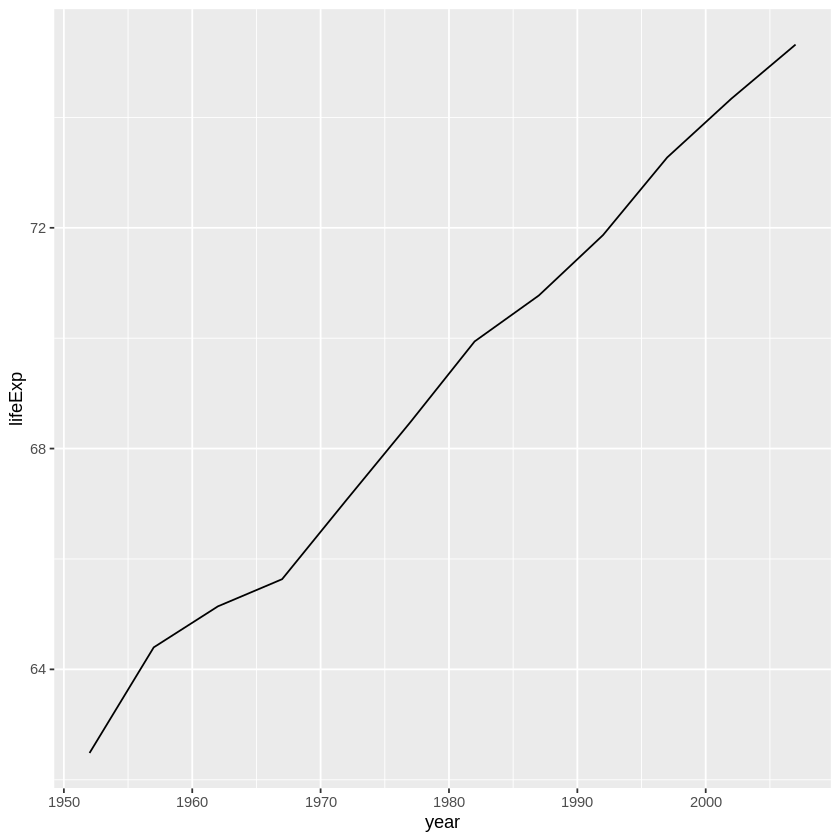

In [ ]:
gapminder %>%
filter(country == 'Argentina') %>%
select(country, year, lifeExp)%>%
group_by(year) %>%
ggplot(mapping=aes(x=year, y=lifeExp)) +
  geom_line()

3. ¿Cómo es la evolución a lo largo de todo el período de la población total por continente?

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.



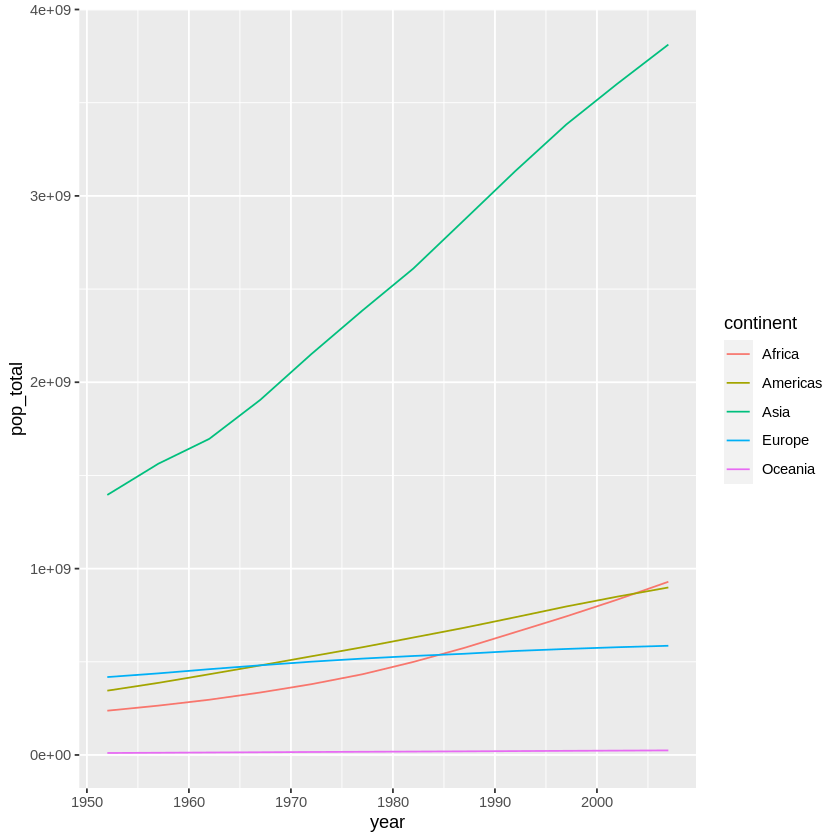

In [ ]:
gapminder %>%
  group_by(continent, year)%>%
  summarise(pop_total = sum(pop))%>%
  ggplot()+
    geom_line(mapping = aes(x=year, y=pop_total, color=continent))
